Connected: True


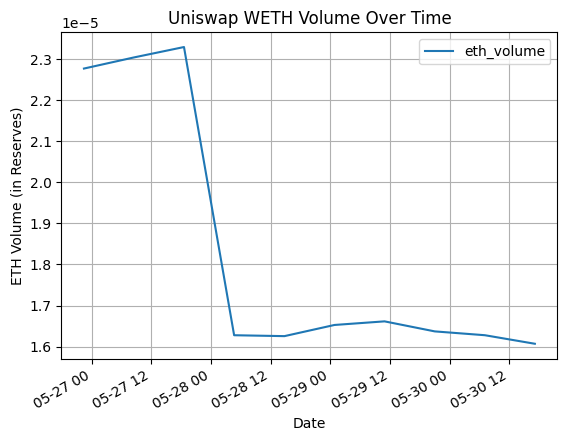

In [8]:
from web3 import Web3
import datetime
import matplotlib.pyplot as plt
import pandas as pd
!pip install chardet

# Connect to Ethereum Mainnet via Infura
INFURA_URL = "https://mainnet.infura.io/v3/970d6fade55f407e9072e1a4953f1742"
w3 = Web3(Web3.HTTPProvider(INFURA_URL))
print("Connected:", w3.is_connected())

# Uniswap V2 USDC/WETH pair contract
pair_address = Web3.to_checksum_address('0xB4e16d0168e52d35CaCD2c6185b44281Ec28C9Dc')

# Replace this with full ABI from Etherscan
import json

with open("abi.json", "r") as f:
    contract_abi = json.load(f)

pair_address = Web3.to_checksum_address('0xB4e16d0168e52d35CaCD2c6185b44281Ec28C9Dc')
contract = w3.eth.contract(address=pair_address, abi=contract_abi)

# Block sampling setup
end_block = w3.eth.block_number
step = 3000
blocks = list(range(end_block - 30000, end_block, step))

# Fetch reserve data
volumes = []
for block in blocks:
    reserves = contract.functions.getReserves().call(block_identifier=block)
    timestamp = w3.eth.get_block(block)['timestamp']
    volumes.append({
        'block': block,
        'eth_volume': reserves[0] / 1e18,  # WETH reserve
        'timestamp': datetime.datetime.fromtimestamp(timestamp)
    })

# Plotting
df = pd.DataFrame(volumes)
df.plot(x='timestamp', y='eth_volume', title='Uniswap WETH Volume Over Time')
plt.ylabel("ETH Volume (in Reserves)")
plt.xlabel("Date")
plt.grid(True)
plt.show()